In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split


# Image manipulation.
import PIL.Image

import pickle

#Panda
import pandas as pd

#Open a Zip File
from zipfile import ZipFile
from io import BytesIO

#check tensorflow version
tf.__version__

'1.3.0'

In [2]:
#We unzip the train and test zip file
archive_train = ZipFile("../data/train.zip", 'r')
archive_test = ZipFile("../data/test.zip", 'r')

In [3]:
archive_train.namelist()[:4]

['train/',
 'train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg']

In [4]:
len(archive_train.namelist()[:])-1

10222

In [24]:
def resize_and_create_pickle_database(archivezip,img_width,img_height,save_name):
    s = (len(archivezip.namelist()[:100])-1, img_width,img_height,3)
    allImage = np.zeros(s)
    
    for i in range(1,len(archivezip.namelist()[:100])):
        filename = BytesIO(archivezip.read(archivezip.namelist()[i]))
        image = PIL.Image.open(filename)
        image = image.resize((img_width, img_height))
        image = np.array(image)
        image = np.clip(image/255.0, 0.0, 1.0) #255 = max of the value of a pixel
        
        #we save the newly created data base
        tt= pickle.dump(allImage, open( save_name + '.p', "wb" ) )
    return tt


In [25]:
img_width= 40
img_height= 40

In [26]:
# train images resized and created pickle database
resize_and_create_pickle_database(archive_train,img_width,img_height,"train")

In [27]:
#test images resized and created pickle database
resize_and_create_pickle_database(archive_test,img_width,img_height,"test")

In [28]:
#load TRAIN
train = pickle.load( open( "train.p", "rb" ) )
train.shape


(99, 40, 40, 3)

In [29]:
#load TEST
test = pickle.load( open( "test.p", "rb" ) )
test.shape

(99, 40, 40, 3)

In [30]:
df_train= pd.read_csv('../data/labels.csv')
df_train.sample(4)

,id,breed
3128,4d67f3d5c331a1a83c9eede0df8e3e37,brittany_spaniel
9248,e8489d90981775781ccff2f27f7f413a,english_springer
7121,b2bab263aaa473785d7c88eec236acd8,irish_wolfhound
9941,f9b7736812c24f6de73012511303fb28,standard_schnauzer


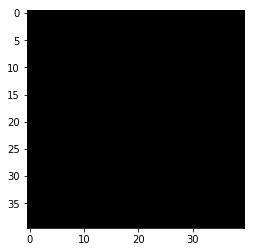

In [31]:
lum_img = train[1,:,:,:]
plt.imshow(lum_img)
plt.show()